In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
candyData = pd.read_csv('candyhierarchy2017.csv',encoding = 'ISO-8859-1')

In [5]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

# Columns 1 through 3

In [6]:
candyData.set_index('Internal ID', inplace = True)

In [7]:
candyData = candyData.rename(columns={'Q3: AGE': 'Age', 'Q1: GOING OUT?': 'Going_out', 'Q2: GENDER': 'Gender'} )

In [8]:
#candyData.head()

In [9]:
candyData.Age.describe()

count     2376
unique     106
top         40
freq        92
Name: Age, dtype: object

In [10]:
#candyData.Age.value_counts()

In [11]:
candyData.Age.isnull().sum()

84

In [12]:
candyData['Age'] = candyData['Age'].str.replace('\D+', '  ')

In [13]:
candyData['Age'] = candyData['Age'].str.replace(' ', '')

In [14]:
#candyData.Age.value_counts()

In [15]:
candyData['Age'] = pd.to_numeric(candyData['Age'], errors='coerce')

In [16]:
candyData.Age.isnull().sum()

100

In [17]:
#candyData[candyData['Age'] > 105]

In [18]:
candyData['Age'] = candyData['Age'].replace(2450, np.mean((24,50)))
candyData['Age'] = candyData['Age'].replace(4555, np.mean((45,55)))
candyData['Age'] = candyData['Age'].replace(394, 39)
candyData['Age'] = candyData['Age'].replace(7012, 71)

In [19]:
candyData[candyData['Age'] > 105]

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90274337,No,Other,312.0,Canada,BC,MEH,MEH,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,MEH,JOY,DESPAIR,...,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,MEH,MEH,JOY,MEH,MEH,MEH,JOY,The New Star Trek. Joy almond bars. Sugar cu...,pillow face. rubber bats. opening a pumpkin a...,I am Groot!,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(69, 23)"
90279807,Yes,I'd rather not say,1000.0,Atlantis,"Emerald City, Petrolia",MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,MEH,JOY,MEH,MEH,MEH,JOY,MEH,MEH,MEH,JOY,JOY,MEH,...,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,MEH,MEH,MEH,NaN,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(76, 34)"


In [20]:
candyData['Age'] = candyData.Age.mask((candyData['Age'] > 105), np.nan)
candyData['Age'] = candyData.Age.mask((candyData['Age'] < 5), np.nan)

In [21]:
candyData[candyData['Age'] > 105]

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [22]:
mean_age = candyData['Age'].mean(skipna=True)
mean_age

42.13418259023354

In [23]:
candyData.Age.isnull().sum()

105

In [24]:
candyData.Age.max()

102.0

In [25]:
candyData.Age.min()

5.0

In [26]:
candyData['Age'].fillna(value = mean_age, inplace = True)

In [27]:
candyData.Age.isnull().sum()

0

In [28]:
candyData['Age'] = candyData['Age'].round(0).astype(int)

In [29]:
candyData.Age.dtype

dtype('int64')

In [30]:
#candyData.Age.value_counts()

In [31]:
candyData['Going_out'].describe()

count     2350
unique       2
top         No
freq      2038
Name: Going_out, dtype: object

In [32]:
candyData['Going_out'].isnull().sum()

110

In [33]:
candyData['Going_out'] = candyData['Going_out'].replace(np.NaN,'I\'d rather not say')

In [34]:
candyData['Going_out'].unique()

array(["I'd rather not say", 'No', 'Yes'], dtype=object)

In [35]:
candyData['Gender'].describe()

count     2419
unique       4
top       Male
freq      1467
Name: Gender, dtype: object

In [36]:
candyData['Gender'].isnull().sum()

41

In [37]:
candyData['Gender'] = candyData['Gender'].replace(np.NaN,'I\'d rather not say')

In [38]:
candyData['Gender'].unique()

array(["I'd rather not say", 'Male', 'Female', 'Other'], dtype=object)

In [39]:
df_country=candyData['Q4: COUNTRY']
#find the unique country
unique_country=candyData['Q4: COUNTRY'].unique()

unique_country

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', '

In [40]:
candyData['Q4: COUNTRY']=candyData['Q4: COUNTRY'].str.lower()
usa={'usa', 'murica', 'us', 'united states','america', 'u.s','u s','u.s.', 'u s a', 'unite states', 'united state'}
canadas={'canada', 'can'}
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        for u in usa:
            if u in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'USA')
        for c in canadas:
            if c in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'Canada')
    
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        if 'USA' not in element and 'Canada' not in element:
            candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,np.NaN)

In [41]:
candyData = candyData[pd.notnull(candyData['Q4: COUNTRY'])]

In [42]:
candyData

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
90272829,I'd rather not say,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272840,No,Male,40,USA,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,...,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
90272841,No,Male,23,USA,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
90272853,No,Male,53,USA,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,...,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,Mounds,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,NaN,DESPAIR,...,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY,NaN,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,...,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,Tiny bottles of maple syrup as given out by Cr...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"


In [43]:
state_dic = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 
             'Connecticut':'CT', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 
             'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 
             'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 
             'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'NewHampshire':'NH', 'NewJersey':'NJ', 
             'NewMexico':'NM', 'NewYork':'NY', 'NorthCarolina':'NC', 'NorthDakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 
             'Oregon':'OR', 'Pennsylvania':'PA', 'RhodeIsland':'RI', 'SouthCarolina':'SC', 'SouthDakota':'SD', 
             'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 
             'WestVirginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY', 'AmericanSamoa':'AS', 'DistrictofColumbia':'DC', 
             'FederatedStatesofMicronesia':'FM', 'Guam':'GU', 'MarshallIslands':'MH', 'NorthernMarianaIslands':'MP', 
             'Palau':'PW', 'PuertoRico':'PR', 'VirginIslands':'VI'}

In [45]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])
            if element[:2] == state_dic[key] or element[-2:] == state_dic[key]:
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])

In [46]:
candyData['Q5: STATE, PROVINCE, COUNTY, ETC']

Internal ID
90272821    NM
90272829    IA
90272840    OR
90272841    PA
90272853    CO
            ..
90314359    MD
90314580    NE
90314634    TN
90314658    NC
90314802    IA
Name: Q5: STATE, PROVINCE, COUNTY, ETC, Length: 2263, dtype: object

In [47]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values():
        print(element)

ONTARIO
ONTARIO
QUEBEC
ONTARIO
YUKON
BC
ONTARIO
ONTARIO
ONTARIO
ONTARIO
ONTARIO
BC
ONTARIO
BC
nan
QUEBEC
nan
BC
ONTARIO
SK
ONTARIO
nan
ONTARIO
BC
BC
BC
ONTARIO
ONTARIO
BC
ONTARIO
BC
AB
BC
ONTARIO
ONTARIO
ON
SASKATCHEWAN
BC
AB
BC
SYDNEY
ONTARIO
ONTARIO
BC
ONTARIO
NUNYA, BIZNESS, USA
ONTARIO
ONTARIO
ONTARIO,  CANADA
ONTARIO
QUEBEC
NS
ONTARIO
AB
QC
ONTARIO
nan
nan
BC
nan
nan
BC
QUEBEC
ONTARIO
BROOKLYN
ONTARIO
QLD
ONTARIO
ONTARIO
ONTARIO
ONTARIO
ON
ONTARIO
NS
nan
BC
BC
NB
nan
TORONTO, ONTARIO
ONTARIO
ON
ONT
ONTARIO
ONTARIO
BC
QUEBEC
BC
ONTARIO
BC
ONTARIO
nan
nan
BC
nan
ONTARIO
ONTARIO
nan
ONTARIO
BC
ONTARIO
BC
BRITISH COLUMBIA, CANADA
nan
ONTARIO
ONTARIO
NOYB
ONTARIO
ONTARIO
BC
ONTARIO
ONTARIO
BC
ONTARIO
ONTARIO
NSW
ONTARIO
BC
nan
ONTARIO
NSW
ONTARIO
ONTARIO
ONTARIO
BC
QUEBEC
ONTARIO
ONTARIO
ONTARIO
ONTARIO
ONTARIO
BC
BC
SASKATCHEWAN
BC
BC
QC
BC
ONTARIO
TREE TOWN, USA
ONTARIO
OSHAWA, ONTARIO, CANADA
ONTARIO
nan
NL
ONTARIO
ONTARIO
ONTARIO
QUBEC
ONTARIO
TORONTO, ONTARIO
BC
nan
nan
ONTARIO
B

In [48]:
ca_state_dic = {'Ontario':'ON', 'Quebec':'QC', 'NovaScotia':'NS', 'New Brunswick':'NB',
                'Manitoba':'MB', 'BritishColumbia':'BC', 'PrinceEdward':'PE', 'Saskatchewan':'SK',
                'Alberta':'AB', 'NewfoundlandAndLabrador':'NL', 'NorthwestTerritories':'NT',
                'Yukon':'YT', 'Nunavut':'NU'}

In [49]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in ca_state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,ca_state_dic[key])

In [50]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values() and element not in ca_state_dic.values():
        print(element);

nan
nan
nan
SYDNEY
NUNYA, BIZNESS, USA
nan
nan
nan
nan
BROOKLYN
QLD
nan
nan
ONT
nan
nan
nan
nan
nan
NOYB
NSW
nan
NSW
TREE TOWN, USA
nan
QUBEC
nan
nan
nan
CHICAGO
ONT
nan
QUENEC
QUBEC
nan


In [51]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values() and element not in ca_state_dic.values():
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,np.NaN)

In [52]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values() and element not in ca_state_dic.values():
        print(element)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [53]:
candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(np.NaN,'I\'d rather not say')

In [54]:
candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(np.NaN,'I\'d rather not say')

In [55]:
candyData.isnull().sum()

Going_out                              0
Gender                                 0
Age                                    0
Q4: COUNTRY                            0
Q5: STATE, PROVINCE, COUNTY, ETC       0
                                    ... 
Q12: MEDIA [Daily Dish]             2183
Q12: MEDIA [Science]                 972
Q12: MEDIA [ESPN]                   2170
Q12: MEDIA [Yahoo]                  2204
Click Coordinates (x, y)             748
Length: 119, dtype: int64

In [56]:
candyData

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
90272829,I'd rather not say,Male,49,USA,IA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272840,No,Male,40,USA,OR,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,...,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
90272841,No,Male,23,USA,PA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,...,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
90272853,No,Male,53,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,...,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH,Mounds,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
90314580,No,Female,33,USA,NE,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,NaN,DESPAIR,...,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY,NaN,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
90314634,No,Female,26,USA,TN,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,...,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,Tiny bottles of maple syrup as given out by Cr...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"


In [57]:
candyData.drop('Q7: JOY OTHER', axis=1, inplace=True)
candyData.drop('Q8: DESPAIR OTHER', axis=1, inplace=True)
candyData.drop('Q9: OTHER COMMENTS', axis=1, inplace=True)
candyData.drop('Q10: DRESS', axis=1, inplace=True)
candyData.drop('Unnamed: 113', axis=1, inplace=True)
candyData.drop('Q11: DAY', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Daily Dish]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Science]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [ESPN]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Yahoo]', axis=1, inplace=True)
candyData.drop('Click Coordinates (x, y)', axis=1, inplace=True)

In [58]:
candyData

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
90272829,I'd rather not say,Male,49,USA,IA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272840,No,Male,40,USA,OR,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,...,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
90272841,No,Male,23,USA,PA,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,...,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
90272853,No,Male,53,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,...,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
90314580,No,Female,33,USA,NE,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,NaN,DESPAIR,...,MEH,DESPAIR,JOY,DESPAIR,NaN,JOY,MEH,NaN,MEH,MEH,MEH,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
90314634,No,Female,26,USA,TN,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH


In [59]:
gender_count = candyData['Gender'].value_counts()

In [60]:
gender_count_df = pd.DataFrame(data=gender_count)
gender_count_df

,Gender
Male,1372
Female,793
I'd rather not say,71
Other,27


array([<matplotlib.axes._subplots.AxesSubplot object at 0x122e84ac8>],
      dtype=object)

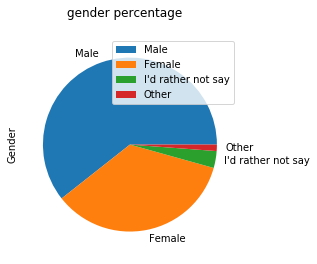

In [61]:
gender_count_df.plot.pie(subplots=True,title='gender percentage')

In [62]:
candyRank = candyData.drop(candyData.columns[0:5], axis=1, inplace=False)
candyRank

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272821,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
90272829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272840,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,...,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
90272841,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,...,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
90272853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314359,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,JOY,...,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
90314580,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,NaN,DESPAIR,DESPAIR,DESPAIR,MEH,NaN,MEH,...,MEH,DESPAIR,JOY,DESPAIR,NaN,JOY,MEH,NaN,MEH,MEH,MEH,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
90314634,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,...,JOY,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH


In [63]:
candyRank.replace('JOY', 3, inplace=True)
candyRank.replace('MEH',1, inplace=True)
candyRank.replace('DESPAIR',0, inplace=True)

In [64]:
candyRank

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272821,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
90272829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272840,1.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0
90272841,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,...,3.0,NaN,3.0,3.0,0.0,NaN,1.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,3.0,1.0,3.0,3.0,0.0,0.0,3.0
90272853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90314359,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0,3.0,...,3.0,3.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,0.0,1.0,3.0,0.0,1.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0
90314580,1.0,0.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,3.0,0.0,NaN,3.0,1.0,NaN,1.0,1.0,1.0,NaN,3.0,0.0,0.0,1.0,1.0,0.0,3.0,NaN,NaN,3.0,0.0,1.0,3.0
90314634,1.0,0.0,3.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,...,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0


In [65]:
candyScore = candyRank.sum()

In [66]:
candyScore_df = pd.DataFrame(data=candyScore, columns=['score'])

In [67]:
candyScore_df

,score
Q6 | 100 Grand Bar,3196.0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),931.0
Q6 | Any full-sized candy bar,4599.0
Q6 | Black Jacks,803.0
Q6 | Bonkers (the candy),1124.0
...,...
Q6 | Vicodin,2244.0
Q6 | Whatchamacallit Bars,2893.0
Q6 | White Bread,310.0
Q6 | Whole Wheat anything,619.0


In [68]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['figure.figsize'] = 20, 20

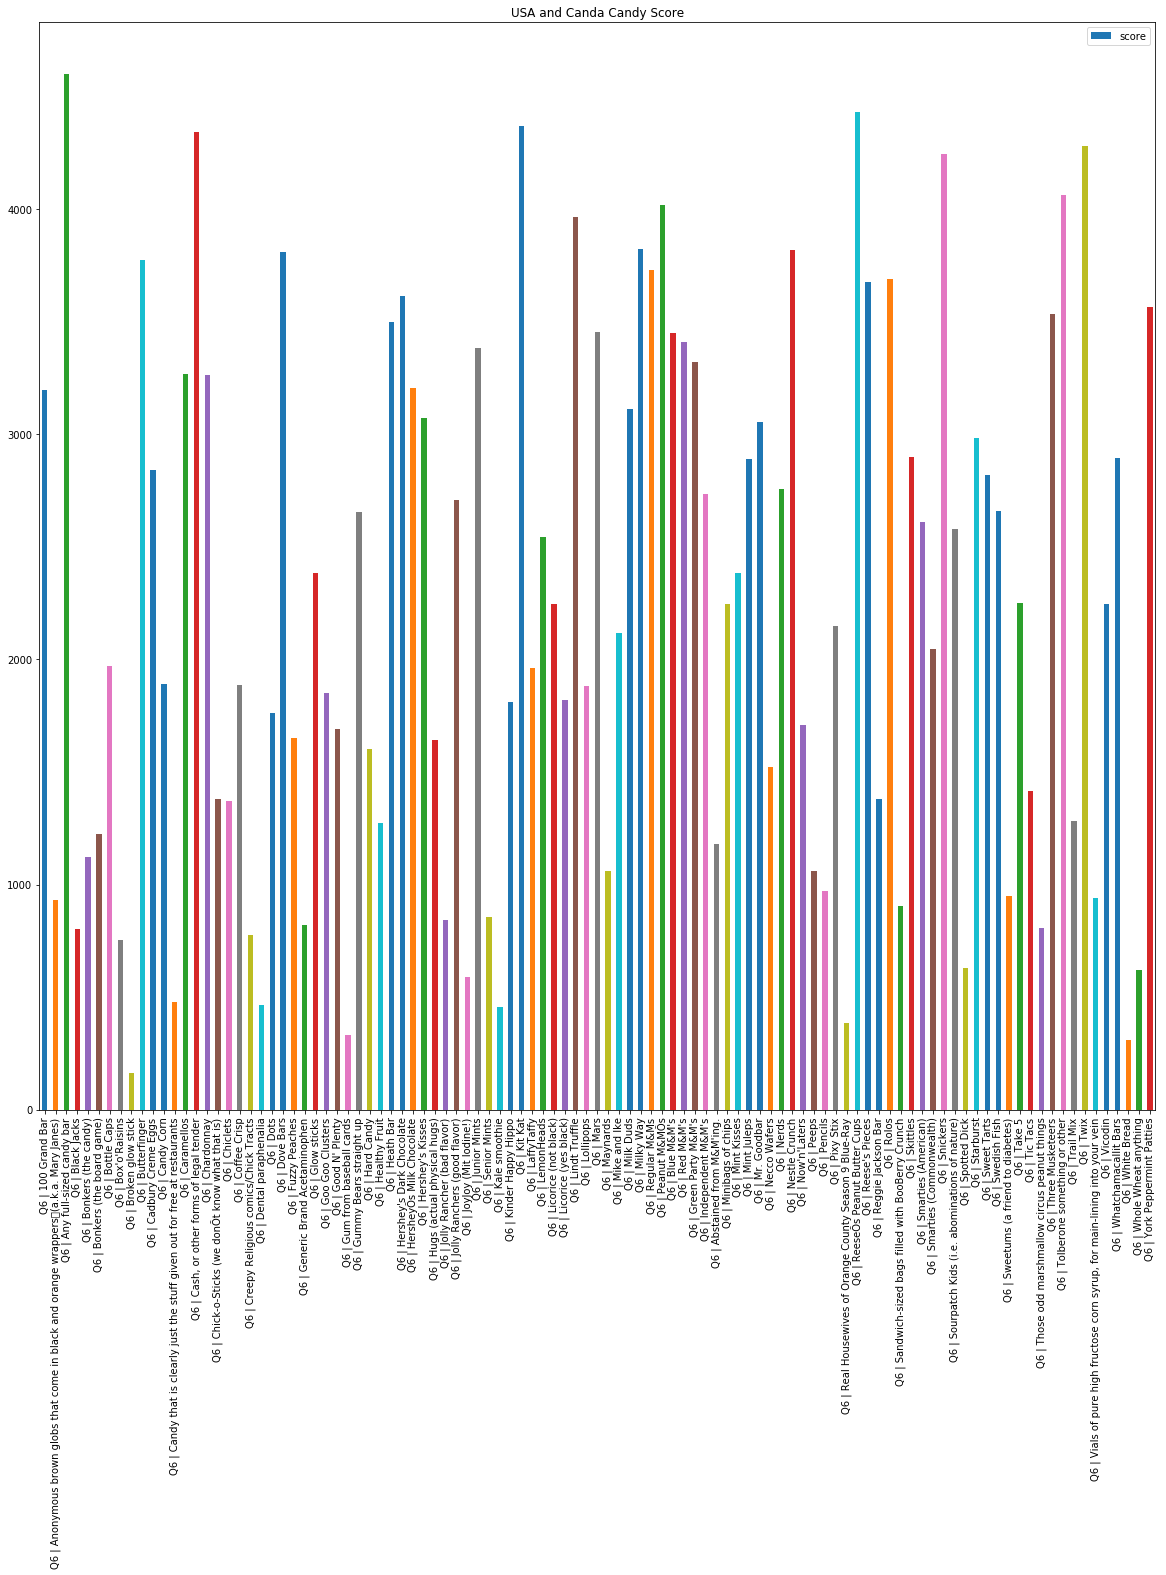

In [69]:
candyScore_df.plot(kind='bar',y='score',title='USA and Canda Candy Score')

In [70]:
CO_data = candyData.loc[candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] == 'CO']

In [71]:
CO_data

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272853,No,Male,53,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272881,No,Male,48,USA,CO,MEH,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,MEH,JOY,MEH,JOY,MEH,MEH,MEH,DESPAIR,...,MEH,MEH,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH
90272901,No,Male,35,USA,CO,JOY,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
90273053,No,Female,35,USA,CO,MEH,DESPAIR,JOY,NaN,NaN,NaN,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,MEH,NaN,DESPAIR,DESPAIR,NaN,NaN,...,JOY,NaN,MEH,DESPAIR,MEH,JOY,JOY,NaN,JOY,DESPAIR,JOY,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,JOY,NaN,NaN,JOY,NaN,NaN,JOY
90273058,No,Male,42,USA,CO,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,...,JOY,DESPAIR,MEH,MEH,MEH,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90290159,No,Male,36,USA,CO,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,...,JOY,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY
90298440,No,Female,30,USA,CO,JOY,NaN,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,NaN,JOY,JOY,NaN,MEH,NaN,DESPAIR,...,JOY,MEH,MEH,NaN,NaN,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,MEH,NaN,NaN,JOY,DESPAIR,DESPAIR,DESPAIR
90302275,I'd rather not say,Female,17,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
CO_Gender_Rank = CO_data.drop(candyData.columns[2:5], axis=1, inplace=False)
CO_Gender_Rank = CO_Gender_Rank.drop(CO_Gender_Rank.columns[0], axis=1, inplace=False)
CO_Gender_Rank

,Gender,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272853,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272881,Male,MEH,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,MEH,JOY,MEH,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,...,MEH,MEH,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,MEH,MEH,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH
90272901,Male,JOY,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,...,JOY,DESPAIR,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,JOY,MEH,JOY,MEH,MEH,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
90273053,Female,MEH,DESPAIR,JOY,NaN,NaN,NaN,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,MEH,NaN,DESPAIR,DESPAIR,NaN,NaN,DESPAIR,MEH,MEH,NaN,...,JOY,NaN,MEH,DESPAIR,MEH,JOY,JOY,NaN,JOY,DESPAIR,JOY,NaN,JOY,DESPAIR,DESPAIR,MEH,MEH,MEH,JOY,NaN,NaN,JOY,NaN,NaN,JOY
90273058,Male,JOY,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,...,JOY,DESPAIR,MEH,MEH,MEH,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90290159,Male,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,...,JOY,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY
90298440,Female,JOY,NaN,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,NaN,JOY,JOY,NaN,MEH,NaN,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,...,JOY,MEH,MEH,NaN,NaN,JOY,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,MEH,JOY,DESPAIR,MEH,NaN,NaN,JOY,DESPAIR,DESPAIR,DESPAIR
90302275,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
CO_Gender_Rank.replace('JOY', 3, inplace=True)
CO_Gender_Rank.replace('MEH',1, inplace=True)
CO_Gender_Rank.replace('DESPAIR',0, inplace=True)

In [74]:
CO_Gender_Rank

,Gender,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,...,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90272853,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90272881,Male,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,...,1.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0,1.0
90272901,Male,3.0,1.0,3.0,1.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,...,3.0,0.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,3.0
90273053,Female,1.0,0.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,1.0,1.0,NaN,...,3.0,NaN,1.0,0.0,1.0,3.0,3.0,NaN,3.0,0.0,3.0,NaN,3.0,0.0,0.0,1.0,1.0,1.0,3.0,NaN,NaN,3.0,NaN,NaN,3.0
90273058,Male,3.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,1.0,0.0,3.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,...,3.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90290159,Male,3.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,3.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0
90298440,Female,3.0,NaN,3.0,NaN,NaN,NaN,NaN,0.0,0.0,3.0,0.0,1.0,1.0,NaN,3.0,3.0,NaN,1.0,NaN,0.0,0.0,3.0,3.0,0.0,...,3.0,1.0,1.0,NaN,NaN,3.0,1.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,0.0,1.0,3.0,0.0,1.0,NaN,NaN,3.0,0.0,0.0,0.0
90302275,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
col_list= list(CO_Gender_Rank)
col_list.remove('Gender')
#col_list

In [76]:
candyData['Gender'].value_counts()

Male                  1372
Female                 793
I'd rather not say      71
Other                   27
Name: Gender, dtype: int64

In [78]:
CO_Gender_Rank['score'] = CO_Gender_Rank[col_list].sum(axis=1)
CO_Gender_Score = CO_Gender_Rank.drop(CO_Gender_Rank[col_list], axis=1, inplace=False)
CO_Gender_Score

,Gender,score
Internal ID,,
90272853,Male,0.0
90272881,Male,134.0
90272901,Male,208.0
90273053,Female,108.0
90273058,Male,131.0
...,...,...
90290159,Male,161.0
90298440,Female,108.0
90302275,Female,0.0


In [79]:
CO_Gender_Rank['Gender'].value_counts()

Male                  45
Female                23
Other                  3
I'd rather not say     1
Name: Gender, dtype: int64

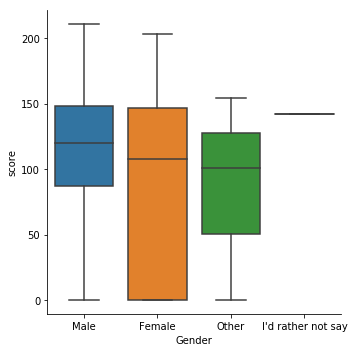

In [80]:
sns.catplot(x="Gender", y="score", kind="box", data=CO_Gender_Rank);